# Classification Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.tree import export_graphviz

In [5]:
import graphviz
import pydotplus
from IPython.display import Image

In [6]:
df0 = pd.read_csv('Carseats.csv')
df0[:9]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No


In [7]:
df0.rename({'ShelveLoc': 'Shelve'}, axis=1, inplace=True)
df0.shape

(400, 11)

In [8]:
df1 = pd.get_dummies(df0,columns=['Shelve','Urban','US'])
df1 = df1.drop(['Shelve_Bad','Urban_No','US_No'],axis=1)
df1[:4]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1


In [9]:
df1['High'] = (df1.Sales > 8)
df1[:6]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes,High
0,9.50,138,73,11,276,120,42,17,0,0,1,1,True
1,11.22,111,48,16,260,83,65,10,1,0,1,1,True
2,10.06,113,35,10,269,80,59,12,0,1,1,1,True
3,7.40,117,100,4,466,97,55,14,0,1,1,1,False
4,4.15,141,64,3,340,128,38,13,0,0,1,0,False
5,10.81,124,113,13,501,72,78,16,0,0,0,1,True


In [10]:
df1['High'] = (df1.Sales > 8).astype(np.int32)
df1[:6]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes,High
0,9.50,138,73,11,276,120,42,17,0,0,1,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1,0
4,4.15,141,64,3,340,128,38,13,0,0,1,0,0
5,10.81,124,113,13,501,72,78,16,0,0,0,1,1


In [11]:
y = df1.High
X = df1.drop(['Sales', 'High'], axis = 1)
X[:3]

,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1


In [12]:
col_names = X.columns.values
col_names

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Shelve_Good', 'Shelve_Medium', 'Urban_Yes', 'US_Yes'],
      dtype=object)

In [13]:
y.value_counts()

0    236
1    164
Name: High, dtype: int64

### Split dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,
                                                    train_size = 0.5,
                                                    test_size = 0.5,
                                                    random_state = 0)

### max_depth = 2

In [15]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth = 2)
model1.fit(X_train, y_train)
yhat = model1.predict(X_test)
model1.score(X_test, y_test)

0.66

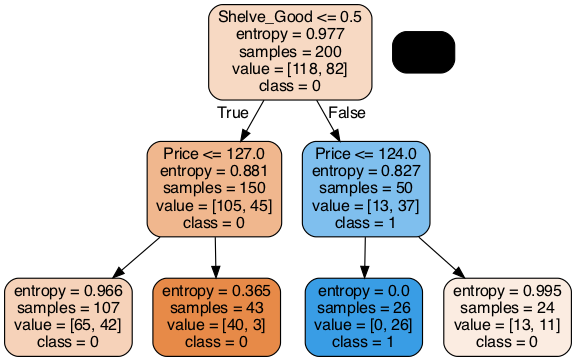

In [16]:
dot_data = export_graphviz(model1,
                            feature_names=col_names,
                            class_names = ['0','1'],
                            out_file=None,filled=True,
                           rounded=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"6,6!"')
pydot_graph.write_png('resized_tree.png');
Image(pydot_graph.create_png())

In [17]:
model2 = DecisionTreeClassifier(criterion='gini',max_depth = 2)
model2.fit(X_train, y_train)
yhat = model2.predict(X_test)
model2.score(X_test, y_test)

0.7

In [18]:
pd.crosstab(y_test,yhat,rownames = ['y_test'],colnames = ['yhat'])

yhat,0,1
y_test,,
0,104,14
1,46,36


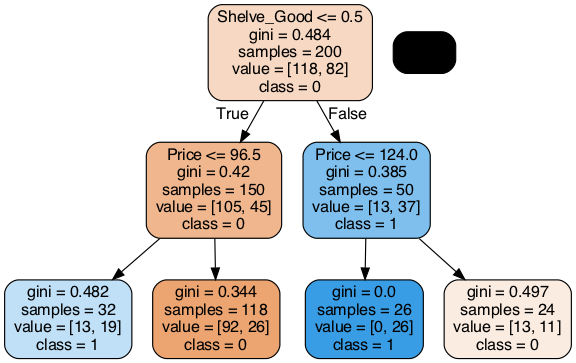

In [19]:
dot_data = export_graphviz(model2,
                            feature_names=col_names,
                            class_names = ['0','1'],
                            out_file=None,filled=True,
                           rounded=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"6,6!"')
pydot_graph.write_png('resized_tree.png');
Image(pydot_graph.create_png())

In [20]:
newval = X[:1]

In [21]:
newval

,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1


In [22]:
model2.predict(newval)

array([0], dtype=int32)

In [23]:
pd.crosstab(y_test,yhat,rownames = ['y_test'],colnames = ['yhat'])

yhat,0,1
y_test,,
0,104,14
1,46,36


Tree predicts store is low sales

In [24]:
# display all gini index from the tree
model2.tree_.impurity

array([0.4838    , 0.42      , 0.48242188, 0.34357943, 0.3848    ,
       0.        , 0.49652778])

### max_depth = 2

In [25]:
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.7

### max_depth = 4

In [26]:
model4 = DecisionTreeClassifier(max_depth = 4)
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

0.72

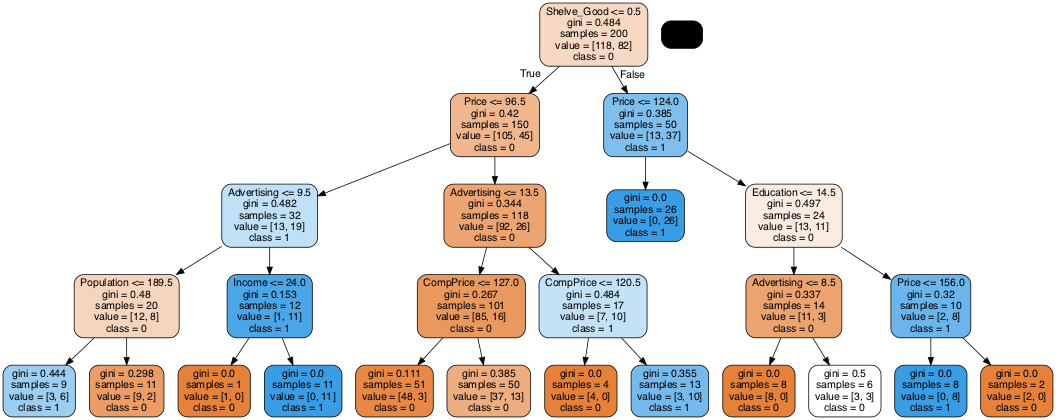

In [27]:
dot_data = export_graphviz(model4,
                                feature_names=col_names,
                                class_names = ['0','1'],                           
                                out_file=None,filled=True,
                                rounded=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"11,11!"')
pydot_graph.write_png('resized_tree.png');
Image(pydot_graph.create_png())

In [28]:
newval

,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1


In [29]:
model4.predict(newval)

array([0], dtype=int32)

In [30]:
pd.crosstab(y_test,yhat,rownames = ['y_test'],colnames = ['yhat'])

yhat,0,1
y_test,,
0,104,14
1,46,36


## Holdout cross validation to find best max_depth

In [31]:
X_nontest,X_test,y_nontest,y_test = train_test_split(X,y,
                                                 test_size=0.40,
                                                 random_state=1)

In [32]:
X_train,X_validation,\
y_train,y_validation = train_test_split(X_nontest,y_nontest,
                                        test_size=0.5,random_state=1)

In [33]:
depths = range(2,22)

In [34]:
model = DecisionTreeClassifier(random_state=1)
accuracy = []

for i in range(2,22):
    model.set_params(max_depth = i)
    model.fit(X_train, y_train)
    accuracy_i = model.score(X_validation, y_validation)
    accuracy.append(accuracy_i)

In [35]:
df = pd.DataFrame(accuracy,columns = ['Val_Accuracy'])
df.index = depths
df.index.name = 'depth'
df[:11]

,Val_Accuracy
depth,
2,0.691667
3,0.716667
4,0.741667
5,0.716667
6,0.691667
7,0.691667
8,0.691667
9,0.675000
10,0.675000


In [36]:
max1 = df['Val_Accuracy'].max()
max1

0.7416666666666667

In [37]:
df[df.Val_Accuracy == max1]

,Val_Accuracy
depth,
4,0.741667


In [38]:
# best hyperparam value 
# (maximizing validation accuracy rate)
best_depth = df.Val_Accuracy.idxmax()
best_depth

4

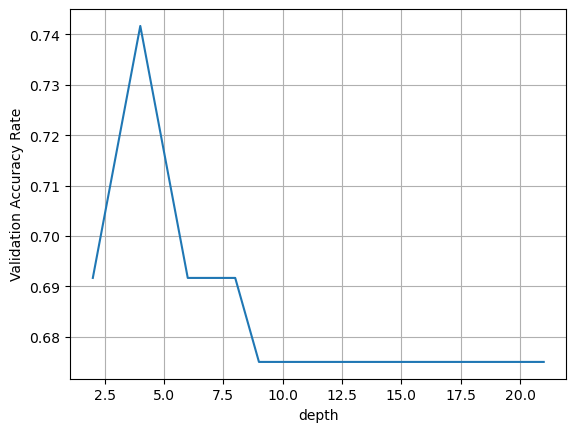

In [39]:
df.plot(grid=True,legend=False)
plt.ylabel('Validation Accuracy Rate');

In [40]:
# Test accuracy rate

In [41]:
model9 = DecisionTreeClassifier(max_depth = best_depth,
                                random_state=1) 
model9.fit(X_nontest, y_nontest)
model9.score(X_test, y_test)

0.70625

In [42]:
# Feature Importances

In [43]:
model9.feature_importances_

array([0.08444228, 0.        , 0.10678597, 0.0138254 , 0.44880677,
       0.04877601, 0.03484001, 0.23483022, 0.        , 0.        ,
       0.02769334])

In [44]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Shelve_Good', 'Shelve_Medium', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [45]:
df9 = pd.DataFrame(100*model9.feature_importances_,
                   index = X.columns,
                   columns=['importance'])
df9 = df9.sort_values(by = 'importance',axis=0,
                      ascending=False)
df9

,importance
Price,44.880677
Shelve_Good,23.483022
Advertising,10.678597
CompPrice,8.444228
Age,4.877601
Education,3.484001
US_Yes,2.769334
Population,1.382540
Income,0.000000
Shelve_Medium,0.000000


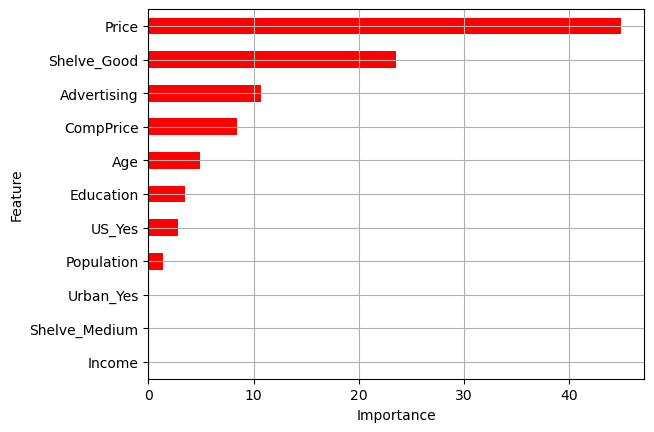

In [46]:
df9 = df9.sort_values(by = 'importance',axis=0)
df9.plot(kind='barh',color='r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

### 5-fold cross validation with max_depth = 7

In [47]:
kfold = StratifiedKFold(n_splits = 5,shuffle = True, random_state=1)
model = DecisionTreeClassifier(max_depth = 7,random_state=1)
test_accuracy_rates = cross_val_score(model,X,y,cv=kfold)
test_accuracy_rates

array([0.65  , 0.7875, 0.8375, 0.7125, 0.625 ])

In [48]:
# Test accuracy rate
test_accuracy_rates.mean()

0.7224999999999999

### 5-fold cross validation to find best max_depth

In [49]:
X_nontest,X_test,y_nontest,y_test = train_test_split(X,y,
                                                 test_size=0.40,
                                                 random_state=1)

In [50]:
model = DecisionTreeClassifier(random_state=1)
parameters = {'max_depth':range(3,20)}

In [51]:
grid = GridSearchCV(model, parameters, cv=kfold)
grid.fit(X_nontest, y_nontest);

In [52]:
# Best depth
grid.best_params_

{'max_depth': 6}

In [53]:
# Best Validation Accuracy Rate
grid.best_score_

0.7666666666666667

In [54]:
# Test Accuracy Rate
best_model = grid.best_estimator_
best_model.score(X_test, y_test)

0.775

In [55]:
# Confusion Matrix
best_model.fit(X_nontest, y_nontest)
yhat = best_model.predict(X_test)

In [56]:
df1 = pd.crosstab(y_test,yhat,
            rownames = ['y_test'],
            colnames = ['yhat'])
df1

yhat,0,1
y_test,,
0,79,14
1,22,45


In [57]:
# Test Accuracy Rate from the Confusion matrix
np.diag(df1).sum()/df1.to_numpy().sum()

0.775

In [58]:
# Feature Importances

In [59]:
best_model.feature_importances_

array([0.16034346, 0.03560911, 0.11234705, 0.02766065, 0.35954997,
       0.07983719, 0.02311168, 0.15577843, 0.02739163, 0.        ,
       0.01837083])

In [60]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Shelve_Good', 'Shelve_Medium', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [61]:
df9 = pd.DataFrame(100*best_model.feature_importances_,
                   index = X.columns,
                   columns=['importance'])
df9 = df9.sort_values(by = 'importance',axis=0,
                      ascending=False)
df9

,importance
Price,35.954997
CompPrice,16.034346
Shelve_Good,15.577843
Advertising,11.234705
Age,7.983719
Income,3.560911
Population,2.766065
Shelve_Medium,2.739163
Education,2.311168
US_Yes,1.837083


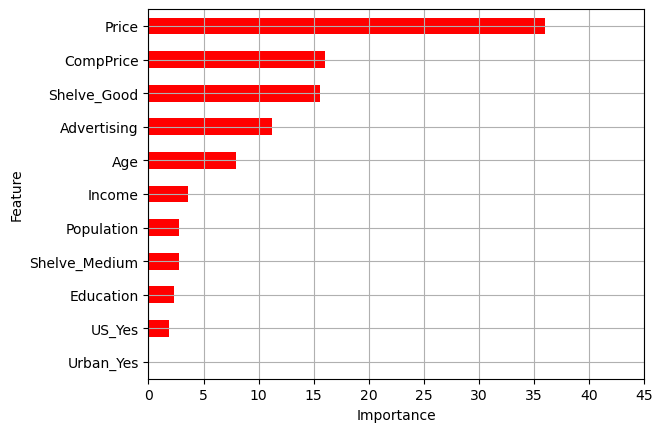

In [62]:
df9 = df9.sort_values(by = 'importance',axis=0)
df9.plot(kind='barh',color='r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xlim([0,45])
plt.grid()